In [16]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import sys
sys.path.append("/Users/claire/Desktop/Stuff-/codes/dissertation/cxr/rgrg/")
from src.dataset.constants import *

In [2]:
import json
with open('/Users/claire/Desktop/Stuff-/codes/dissertation/data/chest-imagenome-dataset-1.0.0/silver_dataset/cfb03587-782edf6c-1bf392e1-98196cd5-365d69e8_SceneGraph.json') as json_file:
    data = json.load(json_file)

In [5]:
df = pd.read_csv('/Users/claire/Desktop/Stuff-/codes/dissertation/data/dataset-with-reference-reports/train.csv')

In [17]:
def process_attribute(attribute_list):
    list_of_anatomical_findings = []
    # merge list of list to list
    attribute_list = [item for sublist in attribute_list for item in sublist]
    # remove duplicates
    attribute_list = list(set(attribute_list))
    for attribute in attribute_list:
        # get words from 'anatomicalfinding|no|lung opacity'
        category, status, term  = attribute.split('|')
        if category == 'anatomicalfinding' and status == 'yes':
            if term not in ANATOMICAL_FINDINGS:
                ANATOMICAL_FINDINGS[term] = len(ANATOMICAL_FINDINGS)
            if term not in list_of_anatomical_findings:
                list_of_anatomical_findings.append(ANATOMICAL_FINDINGS[term])
        
        
    return list_of_anatomical_findings

In [21]:
def process_bbox_abnormalities(df):
    df['bbox_abnormalities'] = [[] for _ in range(len(df))]
    for i in range(len(df)):
        
        # list of 29 empty lists
        bbox_abnormalities = [[] for _ in range(29)]
        j1 = json.load(open('/Users/claire/Desktop/Stuff-/codes/dissertation/data/chest-imagenome-dataset-1.0.0/silver_dataset/scene_graph/' + df['image_id'][i] + '_SceneGraph.json'))
        for item in j1['attributes']:
            if item['bbox_name'] in ANATOMICAL_REGIONS:
                ind = ANATOMICAL_REGIONS[item['bbox_name']]
                bbox_abnormalities[ind] = process_attribute(item['attributes'])
        # write to df
        df['bbox_abnormalities'][i] = bbox_abnormalities
            

In [22]:
process_bbox_abnormalities(df)

/var/folders/2z/h0y9349s3jb77rx4r2hq730w0000gn/T/ipykernel_90321/3555267335.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bbox_abnormalities'][i] = bbox_abnormalities


In [24]:
bbox_abnormalities = df['bbox_abnormalities']

def process_bbox_abnormality(bbox_abnormality):
    # merge list of list to list
    bbox_abnormality = [item for sublist in bbox_abnormality for item in sublist]
    # remove duplicates
    bbox_abnormality = list(set(bbox_abnormality))
    return bbox_abnormality

df['image_abnormalities'] = [[] for _ in range(len(df))]
for i in range(len(df)):
    df['image_abnormalities'][i] = process_bbox_abnormality(df['bbox_abnormalities'][i])
df

/var/folders/2z/h0y9349s3jb77rx4r2hq730w0000gn/T/ipykernel_90321/3887009566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_abnormalities'][i] = process_bbox_abnormality(df['bbox_abnormalities'][i])


,subject_id,study_id,image_id,mimic_image_file_path,bbox_coordinates,bbox_labels,bbox_phrases,bbox_phrase_exists,bbox_is_abnormal,bbox_abnormalities,image_abnormalities
0,10000980,51967283,943486a3-b3fa9ff7-50f5a769-7a62fcbb-f39b6da4,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[41, 9, 121, 147], [64, 13, 121, 58], [56, 58...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",['A triangular opacity in the right lung apex ...,"[True, True, True, False, True, True, True, Fa...","[True, True, True, False, True, True, True, Fa...","[[21, 0, 11, 12, 17], [21, 0, 17], [21, 0, 17]...","[0, 6, 11, 12, 17, 21]"
1,10000980,54577367,cfb03587-782edf6c-1bf392e1-98196cd5-365d69e8,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[64, 36, 141, 165], [82, 41, 141, 86], [76, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",['There is minimal upper zone vascular redistr...,"[True, True, False, False, True, False, True, ...","[True, True, False, False, True, False, False,...","[[16], [16], [], [], [16], [], [], [], [16], [...","[16, 9, 4, 8]"
2,10000980,54935705,6ad819bb-bae74eb9-7b663e90-b8deabd7-57f8054a,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[48, 25, 121, 149], [59, 28, 118, 65], [56, 6...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",['There are possible small bilateral pleural e...,"[True, True, False, False, True, False, True, ...","[True, True, False, False, True, False, True, ...","[[11, 15, 0], [15, 0], [], [], [15, 0], [], [1...","[0, 3, 8, 9, 11, 15]"
3,10000980,54980801,a75a1fbe-802065ad-717eb7c1-e2ce3552-646276a6,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[41, 44, 117, 184], [61, 48, 117, 91], [56, 9...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['The lungs are clear of consolidation, effusi...","[True, False, False, False, True, False, True,...","[False, False, False, False, False, False, Fal...","[[], [], [], [], [], [], [], [], [], [], [], [...","[9, 4]"
4,10000980,57861150,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[59, 44, 128, 179], [70, 49, 128, 86], [67, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",['Previous pattern of mild pulmonary edema has...,"[True, False, False, True, True, False, True, ...","[True, False, False, True, True, False, True, ...","[[7, 0, 11, 12], [], [], [7, 0], [0], [], [11,...","[0, 4, 7, 8, 9, 11, 12]"
...,...,...,...,...,...,...,...,...,...,...,...
113910,19965414,52796225,a466925a-cbea0220-205c2452-1bd53590-5ea71fa0,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[13, 34, 110, 197], [34, 40, 110, 105], [25, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",['No acute cardiopulmonary process. The lungs ...,"[True, False, False, False, False, False, True...","[False, False, False, False, False, False, Fal...","[[], [], [], [], [], [], [], [], [], [], [], [...","[28, 30]"
113911,19966191,52910260,4aa8d139-d43a0f91-cdd5bcae-8815e2e0-7b4f0806,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[32, 22, 110, 227], [52, 22, 110, 105], [44, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['The lungs are clear of consolidation, vascul...","[True, False, False, False, True, False, True,...","[False, False, False, False, False, False, Fal...","[[], [], [], [], [], [], [], [], [], [], [], [...",[]
113912,19986737,57665859,1eb66c14-7c8152c8-665acb59-84f2f301-7bea3a33,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[22, 24, 125, 211], [64, 29, 121, 77], [37, 7...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",['There are relatively low lung volumes. The r...,"[True, False, False, False, False, False, Fals...","[False, False, False, False, False, False, Fal...","[[], [], [], [], [], [], [], [], [3, 0], [], [...","[0, 3]"
113913,19998198,52656971,c50e0bc8-e572a388-f79e3f75-fe6da189-03829bd9,/Users/claire/Desktop/Stuff-/codes/dissertatio...,"[[48, 30, 123, 178], [64, 33, 123, 83], [56, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",['Lungs are clear 

In [25]:
# occurence of each abnormality
abnormality_count = {}
for i in range(len(df)):
    for abnormality in df['image_abnormalities'][i]:
        if abnormality not in abnormality_count:
            abnormality_count[abnormality] = 1
        else:
            abnormality_count[abnormality] += 1

# sort the abnormality_count
abnormality_count_list = sorted(abnormality_count.items(), key=lambda x: x[1], reverse=True)
# get percentage
percentage = [x[1]/len(df) for x in abnormality_count_list]

print(abnormality_count_list)
print(percentage)

[(0, 69966), (7, 35938), (11, 28719), (8, 25871), (15, 14365), (1, 11821), (2, 7956), (9, 7566), (17, 7063), (4, 6631), (3, 6469), (25, 6308), (31, 5724), (6, 4916), (10, 4448), (13, 4095), (21, 4009), (24, 3957), (27, 3856), (22, 3477), (12, 3262), (5, 2017), (18, 1928), (26, 1825), (20, 1821), (16, 1682), (33, 1637), (32, 1629), (28, 1613), (30, 1498), (29, 1426), (34, 800), (14, 520), (19, 512), (23, 505), (35, 452), (38, 439), (39, 432), (37, 361), (36, 348), (40, 30)]
[0.614194794364219, 0.3154808409779221, 0.25210902866172147, 0.2271079313523241, 0.12610279594434445, 0.10377035508932099, 0.06984154852302155, 0.06641794320326559, 0.062002370188298295, 0.05821006891103015, 0.0567879559320546, 0.055374621428257914, 0.05024799192380284, 0.0431549839792828, 0.03904665759557565, 0.035947855857437566, 0.03519290699205548, 0.03473642628275469, 0.03384980028968968, 0.030522758196901197, 0.02863538603344599, 0.01770618443576351, 0.01692490014484484, 0.016020717201422112, 0.0159856033007066

<BarContainer object of 41 artists>

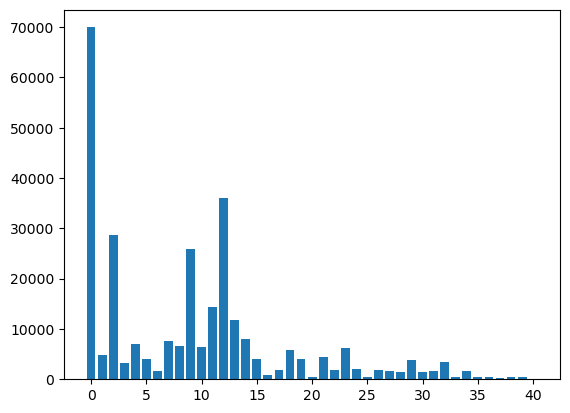

In [26]:
# visualize the distribution of abnormalities
import matplotlib.pyplot as plt
plt.bar(range(len(abnormality_count)), list(abnormality_count.values()), align='center')

In [28]:
# print top five abnormalities
for i in range(40):
    print(abnormality_count_list[i])
    # get ANATOMICAL_FINDINGS.value = abnormality_count_list[i][0]
    for key, value in ANATOMICAL_FINDINGS.items():
        if value == abnormality_count_list[i][0]:
            print(key)

(0, 69966)
lung opacity
(7, 35938)
atelectasis
(11, 28719)
pleural effusion
(8, 25871)
enlarged cardiac silhouette
(15, 14365)
pulmonary edema/hazy opacity
(1, 11821)
vascular congestion
(2, 7956)
pleural/parenchymal scarring
(9, 7566)
tortuous aorta
(17, 7063)
lung lesion
(4, 6631)
vascular calcification
(3, 6469)
consolidation
(25, 6308)
linear/patchy atelectasis
(31, 5724)
hyperaeration
(6, 4916)
enlarged hilum
(10, 4448)
spinal degenerative changes
(13, 4095)
pneumothorax
(21, 4009)
mass/nodule (not otherwise specified)
(24, 3957)
lobar/segmental collapse
(27, 3856)
airspace opacity
(22, 3477)
elevated hemidiaphragm
(12, 3262)
costophrenic angle blunting
(5, 2017)
spinal fracture
(18, 1928)
multiple masses/nodules
(26, 1825)
mediastinal widening
(20, 1821)
scoliosis
(16, 1682)
vascular redistribution
(33, 1637)
hernia
(32, 1629)
calcified nodule
(28, 1613)
superior mediastinal mass/enlargement
(30, 1498)
mediastinal displacement
(29, 1426)
infiltration
(34, 800)
increased reticular

In [30]:
# save df
df.to_csv('/Users/claire/Desktop/Stuff-/codes/dissertation/data/dataset-with-reference-reports/train_ab.csv', index=False)